# Breast Cancer Diagnosos

Breast cancer is the most common invasive cancer in females. It is also a leading cause of cancer deaths among females. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). Hence, the objective of this project is to build a model using machine learning algorithms, that can accurately predict/classify tumors into malignant (cancerous) or benign(non cancerous).

## 1. Data Preparation

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
data = pd.read_csv("breast-cancer.csv") # Data downloaded from kaggle.com


Now, let's check the different features present in the data.

In [3]:
# Preview the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check shape of data
data.shape

(569, 32)

In [ ]:
# Check data types and for missing values (if any)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observations so far:
1.   The dataset contains 569 rows (data points) and 32 columns (features).
2.   The second column is “diagnosis”, where, “M” represents Malignant & “B” represents Benign. This will be our Target column.
3.   There are no missing values in the dataset.








## 2. Data Summary and Exploration

Firstly, let's get na general overview of what the numerical features look like (i.e. their descriptive statistics)

In [ ]:
data.describe() # Descriptive summary of all numerical features

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


For most of the columns, the mean values are a bit larger than the median values (50th percentile: 50%). This is an indication that those features are slightly right skewed. This can be better visualized using a distribution plots.

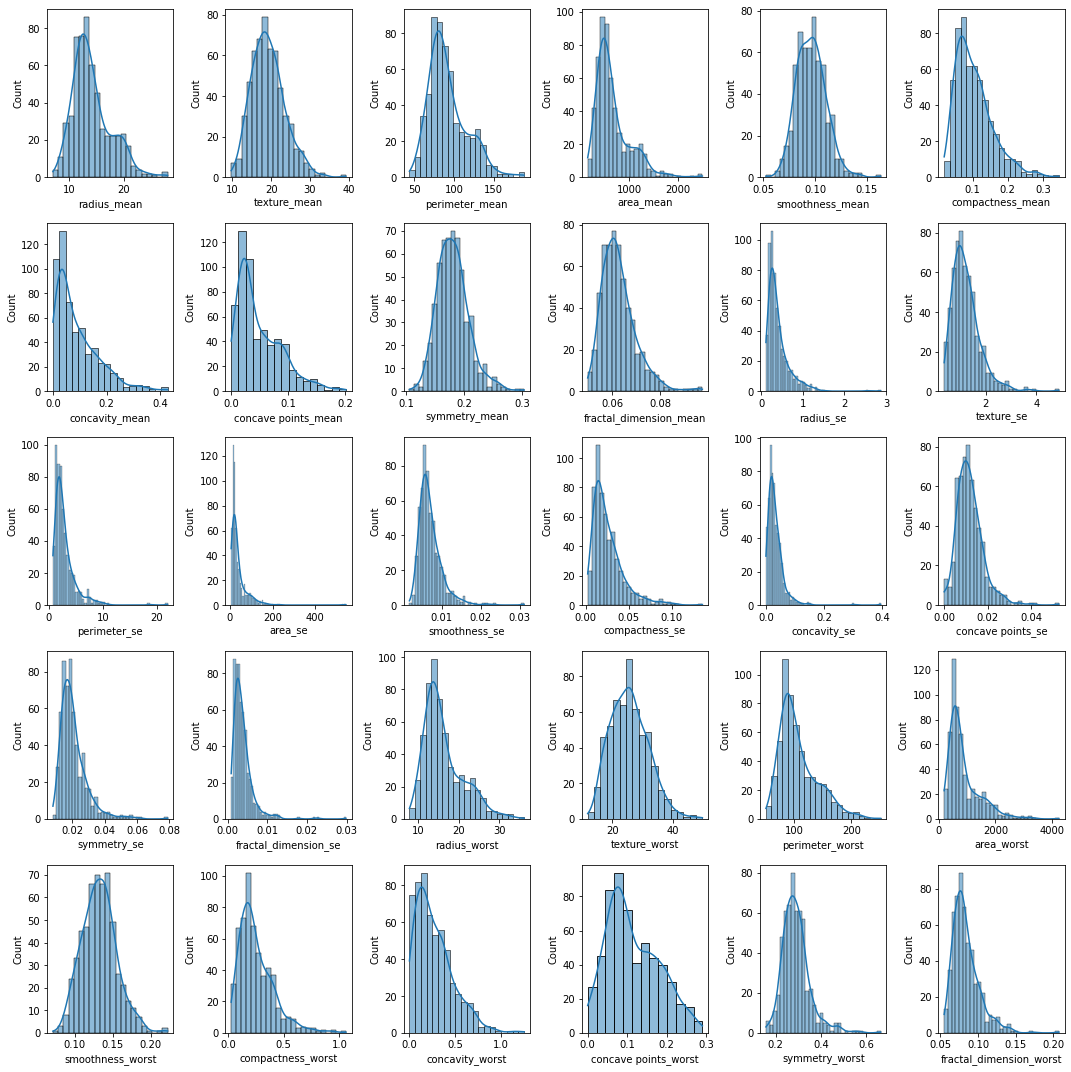

In [6]:
%matplotlib inline
# Subsetting the numerical features
d_num = data.drop(columns=["id", "diagnosis"]).columns.values

# To plot the distribution plots of the subsetted numerical features
n = 6
plt.figure(figsize=[15,3*math.ceil(len(d_num)/n)])
for c in range(len(d_num)):
  plt.subplot(math.ceil(len(d_num)/n),n,c+1)
  sns.histplot(data[d_num[c]], kde=True)
plt.tight_layout()
plt.show();

The histograms also shows that some of the features are rightly-skewed. 

Now, let's check for outliers in this features using boxplots.

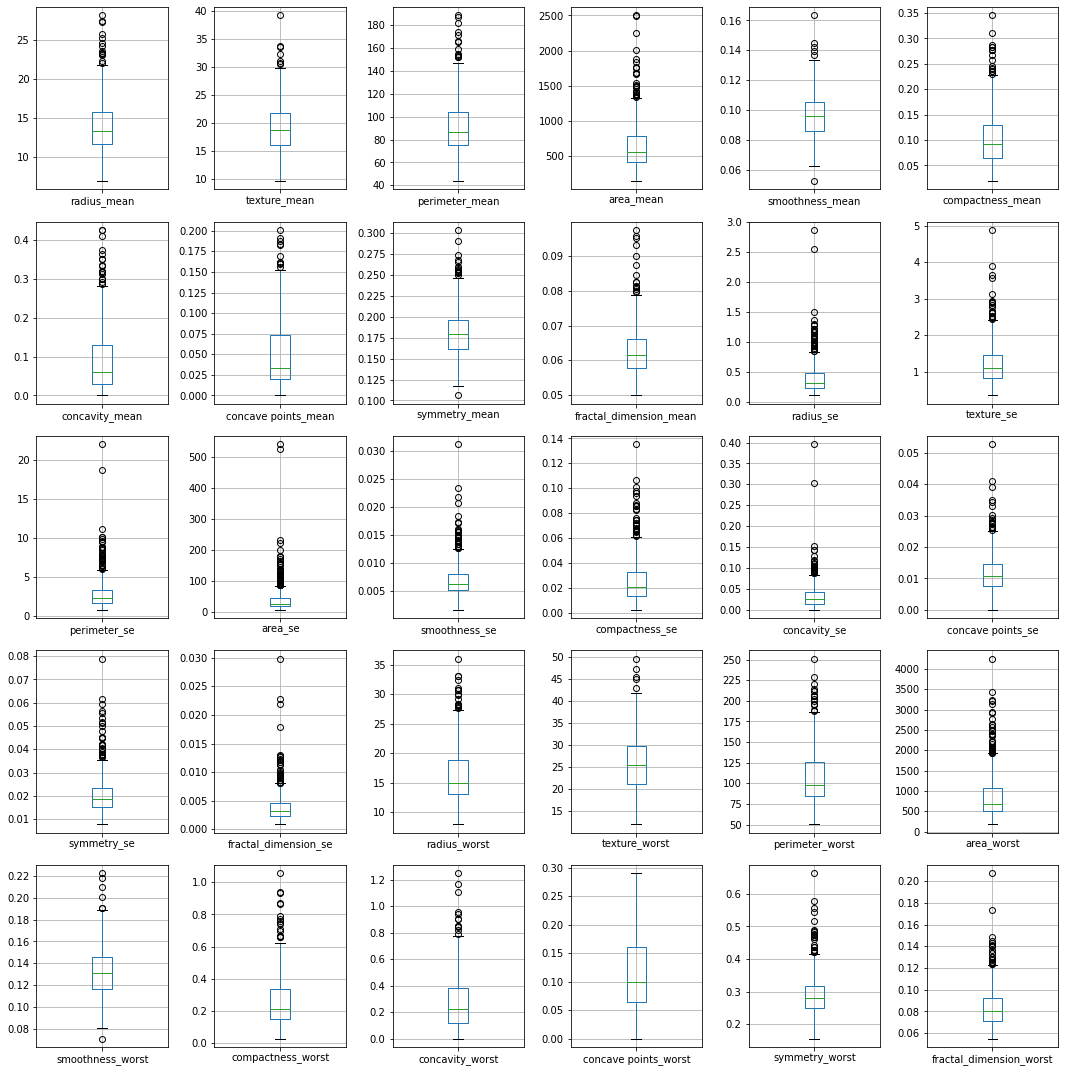

In [7]:
# To plot the boxplots of the subsetted numerical features
plt.figure(figsize=[15,3*math.ceil(len(d_num)/n)])
for c in range(len(d_num)):
    plt.subplot(math.ceil(len(d_num)/n),n,c+1)
    data.boxplot(d_num[c])
plt.tight_layout()
plt.show();

There are outliers in the dataset, and this will need to be fixed as we proceed. 

Next, let's see the way the categorical feature (diagnosis) is distributed.

In [ ]:
data.diagnosis.value_counts() # Frequency distribution of the categorical feature

B    357
M    212
Name: diagnosis, dtype: int64

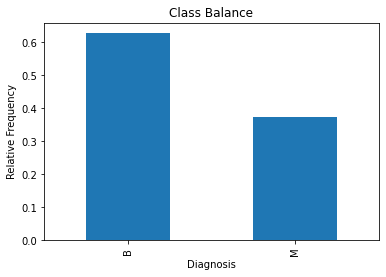

In [8]:
data.diagnosis.value_counts(normalize=True).plot(kind='bar',
                                                  xlabel="Diagnosis", 
                                                  ylabel="Relative Frequency",
                                                  title="Class Balance");

There is a slight imbalance in the dataset (i.e. number of Benign cases is more than number of Malignant cases).

In [ ]:
data.groupby("diagnosis").mean() # Checking the overall mean of each feature by diagnosis type

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Observations so far:
1.    The dataset is mostly skewed to the right.
2.    There are outliers in the dataset.
2.    There is a slight imbalance in the dataset (Benign cases are more than Malignant cases).
3.    The mean value for most of the features are greater for Malignant cases than the mean value for Benign cases.

## 3. Data Preprocessing and Manipulation

The next point of action is to take care of the outliers detected in the dataset.

In [3]:
# Create a copy of the dataset without the 'id' column
data1 = data.drop(columns="id")

for i in [i for i in data1.columns]:
    if data1[i].nunique()>2: # To mask out the categorical feature
        Q1 = data1[i].quantile(0.15) # Keeping the threshold low so as not to lose too much data from the already small dataset
        Q3 = data1[i].quantile(0.85) 
        IQR = Q3 - Q1
        data1 = data1[data1[i].between(Q1-(1.5*IQR),Q3+(1.5*IQR))]
data1 = data1.reset_index(drop=True)
print(f"Before trimming out outliers, The dataset had {data.shape[0]} samples.")
print(f"After trimming out outliers, The dataset now has {data1.shape[0]} samples.")


Before trimming out outliers, The dataset had 569 samples.
After trimming out outliers, The dataset now has 502 samples.


The next step is to check for, and fix (if any) multicolinearity issues

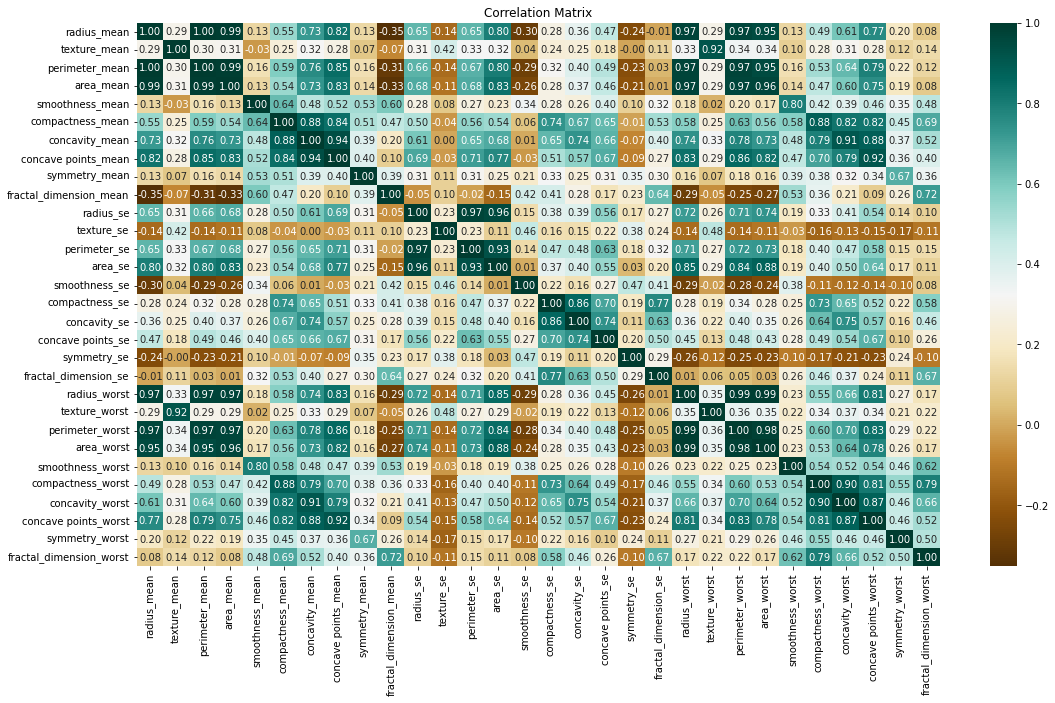

In [4]:
target = "diagnosis"
features = data1.drop(columns=target).columns
plt.figure(figsize=[18,10])
plt.title('Correlation Matrix')
sns.heatmap(data1[features].corr(), annot=True, fmt=".2f", cmap='BrBG') #, 
plt.show()

Some of the features are apparently highly correlated with each other. Let's build a function that detects the highly correlated features, and stores the column names in a list for further actions.

In [7]:
# Function to extract highly correlated features
def HighlyCorr(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Since we are interested in absolute correlation coefficient
                colname = corr_matrix.columns[i]  # To get the name of the columns
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = HighlyCorr(data1[features], 0.9) # Setting a threshold of 0.9
features1 = data1.drop(columns=corr_features).columns # Updating the new working features list
print(f"{len(set(corr_features))} features are highly correlated with eachother. They are:")
print(corr_features)

11 features are highly correlated with eachother. They are:
{'area_se', 'perimeter_worst', 'area_worst', 'concave points_worst', 'texture_worst', 'radius_worst', 'concavity_worst', 'perimeter_se', 'perimeter_mean', 'concave points_mean', 'area_mean'}


In [9]:
# Drop the highly correlated features
data1.drop(columns=corr_features, inplace=True)
print(f"Before dropping the highly correlated features, the data had {data.shape[1] - 1} features (excluding the target variable)")
print(f"After dropping the highly correlated features, the data now has {data1.shape[1] - 1} features (excluding the target variable)")
data1.head()

Before dropping the highly correlated features, the data had 31 features (excluding the target variable)
After dropping the highly correlated features, the data now has 19 features (excluding the target variable)


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2750,0.08902
1,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.3613,0.08758
2,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.2364,0.07678
3,M,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.3985,0.12440
4,M,18.25,19.98,0.09463,0.10900,0.1127,0.1794,0.05742,0.4467,0.7732,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,0.1442,0.2576,0.3063,0.08368


The next step would be to fix the data imbalance using the SMOTE technique.

In [12]:
data2 = data1.copy()
data2[target].replace(['M','B'],
                        [0,1],        # Encoding the categorical variable ('M','B') to 0s and 1s, respectively
                        inplace=True)
print('Original class distribution:')
print(data2[target].value_counts().sort_values())

X = data2[features1].drop(columns=target)   # Splitting the data vertically into target (y) and features (X)
y = data2[target]

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print('\nClass distribution after applying SMOTE Technique:',)
print(y_res.value_counts())

Original class distribution:
0    165
1    337
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
0    337
1    337
Name: diagnosis, dtype: int64


Now, we can horizontally split the resampled dataset into training and test set.

In [13]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Original set (resampled)  ---> ',X_res.shape,y_res.shape,
      '\nTraining set  ---> ',X_train.shape,y_train.shape,
      '\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set (resampled)  --->  (674, 19) (674,) 
Training set  --->  (539, 19) (539,) 
Testing set   --->  (135, 19)  (135,)


In [14]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print('\033[1mStandardardization on Training set')
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X.columns)
display(X_train_sc.head())

print('\n','\033[1mStandardardization on Testing set')
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X.columns)
display(X_test_sc.head())

Standardardization on Training set


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,-0.657761,-0.286191,-1.016743,-1.452586,-1.363230,-0.449782,-0.553226,-0.650195,0.464090,-0.128468,-1.260291,-1.648150,-1.808145,1.183555,-0.932525,-1.463629,-1.452568,-0.847133,-1.302139
1,0.746368,-0.606420,0.366611,-0.004795,0.514052,0.064196,-0.995683,-0.467583,-0.653839,-0.849225,-0.677506,-0.348393,0.231599,-0.846291,-0.690184,0.327417,-0.160428,0.477924,-0.160161
2,1.894660,0.839463,-0.168035,-0.049206,0.259714,-0.130761,-1.608175,1.399556,-0.041381,-0.862080,-0.880012,-0.722088,-0.239629,-1.382640,-0.952079,0.256344,-0.015836,-0.183558,-0.558699
3,-0.151007,0.628297,0.679892,2.281590,1.868187,0.687776,2.037007,1.344400,0.232352,1.156257,3.895139,2.449698,1.506167,-0.336410,1.917641,1.334872,2.720598,-0.135135,2.025239
4,-1.498157,2.091268,-1.352126,-1.356752,-1.159308,-0.786526,-0.375878,-1.108191,1.227962,-0.037598,-0.870882,-0.882589,-1.139169,-0.535864,-0.755832,-1.122478,-1.121414,-1.232300,-0.772565



 Standardardization on Testing set


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,0.417793,0.145538,0.095646,0.648957,0.713351,-0.291401,-0.190086,-0.382428,0.208777,-0.329015,0.943983,0.771936,0.778424,-0.430639,0.338070,0.321030,1.227808,0.581121,0.584596
1,-0.009244,-1.174099,-0.621499,-0.619534,-0.697738,-1.229611,-0.449011,-0.304013,-1.693567,-0.860307,-0.675016,-0.637295,-0.178622,0.479921,-0.396163,-0.601274,-0.454063,0.417218,-0.109920
2,-0.343132,0.493557,-0.873843,-0.746103,-0.553050,0.044891,-0.803221,-0.756689,-0.616058,-1.222953,-0.626986,-0.412797,-0.732982,-0.597768,-0.975436,-0.791350,-0.031735,0.481402,-0.320727
3,1.211059,1.211623,-0.515892,0.210420,0.622213,0.418082,-0.997955,0.614469,-0.839067,-1.140554,-0.477087,0.302975,-0.004845,0.000540,-0.068555,-0.418554,0.283098,1.749837,0.505771
4,-0.616113,-0.463287,-1.424287,-1.381061,-1.180227,-1.504323,-1.121838,-0.535452,-0.593092,0.294412,-0.950557,-1.434774,-1.240357,0.095337,-1.515678,-1.321483,-1.231527,-1.558854,-1.577788


## 4. Model Building and Selection

For the predictive modelling, we shall be building two models - Logistic Regression (LR) and Support Vector Machine (SVM), then choosing the best fitting model out of the two, by comparing their performnce metrics.

In [15]:
#Let us create first create a table to store the results of both models 

Evaluation_Results = pd.DataFrame(np.zeros((2,5)), columns=['Accuracy', 'Precision','Recall','F1-score','ROC-AUC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Support Vector Machine (SVM)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,ROC-AUC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0


In [16]:
# Import required library

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [17]:
#Let us define a summary function for the models.

def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['ROC-AUC score']=round(roc_auc_score(y_test, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('ROC-AUC Score = {}%' .format(round(roc_auc_score(y_test, pred),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))

In [18]:
# Building and Fitting Logistic Regression Model

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
from scipy.stats import loguniform
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)

LR = RCV.fit(X_train_sc, y_train).best_estimator_
pred = LR.predict(X_test_sc)
pred_prob = LR.predict_proba(X_test_sc)
Classification_Summary(pred,pred_prob,0)

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 94.8%
F1 Score = 94.8%
ROC-AUC Score = 95.0%

 Confusiton Matrix:
 [[65  6]
 [ 1 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.91      0.98      0.95        64

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



In [19]:
# Building and Fitting Support Vector Machine Model

SVM_model = SVC(probability=True).fit(X_train_sc, y_train)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42)

SVM = RCV.fit(X_train_sc, y_train).best_estimator_
pred = SVM.predict(X_test_sc)
pred_prob = SVM.predict_proba(X_test_sc)
Classification_Summary(pred,pred_prob,1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 95.6%
F1 Score = 95.6%
ROC-AUC Score = 95.7%

 Confusiton Matrix:
 [[66  5]
 [ 1 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.93      0.98      0.95        64

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



                                     LR and SVM Result Comparison                                    


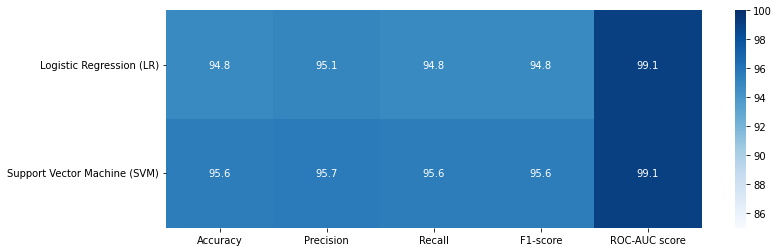

In [20]:
#Comparing all the models Scores

print('\033[1mLR and SVM Result Comparison'.center(105))
plt.figure(figsize=[12,4])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='Blues', fmt='.1f')
plt.show()

Support Vector Machine performs better in almost all its performance metrics for the fitted data. Hence, it is our preferred model for this use case.

## 5. Interpretation and Communication of Result

---
*   ### Accuracy Score: 95.6%
    The model has an overall accuracy score of 95.6%. That is, the model will correctly predict whether the tumor is Malignant or Benign 95.6% of the time.
---
*   ### Overall Precision Score: 95.7%
    The model has an average precision score of 95.7%. For specificity, if our main objective is to accurately detect a cancerous tumor (i.e malignant), then with a precision score of 99% (precision score for the malignant class), we can be 99% confident that any prediction the model makes as malignant is actually malignant. On the flip side, this also means that the model will incorrectly predict benign cases as malignant (false positive) 1% of the time.
---
*   ### Overall Recall Score: 95.6%
    The model has an average recall score of 95.6%. For specificity, if our main objective is still to accurately detect a cancerous tumor (i.e malignant), then a recall score of 93% (recall score for the malignant class) means the model correctly predicts 93% of the true malignant cases. On the flip side, this also means that the model will incorrectly predict malignant cases as benign (false negative) 7% of the time.
---
*   ### Overall F1 Score: 95.6%
    The F1 score is simply the harmonic mean (average) of the precision and recall scores. It reflects how the model performs in predicting the positive class.
---
*    ### ROC-AUC Score: 99.1%
    With an ROC-AUC score of 99.1%, the model will correctly distinguish between both class (malignant and benign) 99.1% of the time in its predictions.





**Mustapha, M. K.**

LinkedIn: [Kola Mustapha](https://www.linkedin.com/in/kola-mustapha-27037856/)

Email: mustapha.mk@outlook.com